In [1]:
import os
import logging
from datetime import datetime
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from datetime import datetime
from networkx import config
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [13]:
df_id = pd.read_csv('selected_images/selected_images_info.csv')
df_id['person_id'].value_counts()

person_id
5047    30
4824    30
5375    29
1844    29
5922    29
        ..
1031    26
5127    26
4135    26
6458    26
8783    26
Name: count, Length: 397, dtype: int64

In [14]:
df_id = df_id[['filename', 'person_id']]
print(df_id.head())
print(f"Всего изображений: {len(df_id)}")
print(f"Уникальных персон: {df_id['person_id'].nunique()}")

     filename  person_id
0  042593.jpg       3340
1  161017.jpg       6023
2  171871.jpg       2180
3  168317.jpg       1582
4  097832.jpg       1359
Всего изображений: 10528
Уникальных персон: 397


In [15]:
img_dir = 'aligned_faces'

Using device: cuda
GPU: NVIDIA GeForce RTX 5060 Ti
GPU Memory: 15.93 GB

ПОДГОТОВКА ДАННЫХ
Всего данных: 10528 изображений
Уникальных людей: 397

После фильтрации:
  Всего изображений: 9306
  Уникальных людей: 350
  Диапазон меток: 0 - 349

Разделение данных по изображениям (стратифицировано)...
Train: 6514 samples
Val: 1396 samples
Test: 1396 samples

ОБУЧЕНИЕ CE МОДЕЛИ
Обучение CE модели с нуля...

Epoch 1/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.28it/s, acc=3.8%]



Итоги эпохи:
  Train Loss: 5.5234, Train Acc: 3.06%
  Val Loss: 5.1590, Val Acc: 4.51%
  Learning Rate: 1.00e-03
  ✓ Сохранена CE модель (Acc: 4.51%)

Epoch 2/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00, 10.08it/s, acc=21.2%]



Итоги эпохи:
  Train Loss: 4.4844, Train Acc: 12.61%
  Val Loss: 4.3568, Val Acc: 13.32%
  Learning Rate: 9.89e-04
  ✓ Сохранена CE модель (Acc: 13.32%)

Epoch 3/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.51it/s, acc=19.2%]



Итоги эпохи:
  Train Loss: 3.8497, Train Acc: 24.92%
  Val Loss: 4.0961, Val Acc: 18.27%
  Learning Rate: 9.57e-04
  ✓ Сохранена CE модель (Acc: 18.27%)

Epoch 4/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.82it/s, acc=25.0%]



Итоги эпохи:
  Train Loss: 3.3422, Train Acc: 37.58%
  Val Loss: 3.5930, Val Acc: 29.51%
  Learning Rate: 9.05e-04
  ✓ Сохранена CE модель (Acc: 29.51%)

Epoch 5/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00, 10.04it/s, acc=38.5%]



Итоги эпохи:
  Train Loss: 2.9134, Train Acc: 49.46%
  Val Loss: 3.1968, Val Acc: 40.90%
  Learning Rate: 8.35e-04
  ✓ Сохранена CE модель (Acc: 40.90%)

Epoch 6/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.40it/s, acc=46.2%]



Итоги эпохи:
  Train Loss: 2.5492, Train Acc: 59.14%
  Val Loss: 3.0033, Val Acc: 46.42%
  Learning Rate: 7.50e-04
  ✓ Сохранена CE модель (Acc: 46.42%)

Epoch 7/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.54it/s, acc=50.0%]



Итоги эпохи:
  Train Loss: 2.2817, Train Acc: 67.17%
  Val Loss: 2.8055, Val Acc: 52.29%
  Learning Rate: 6.55e-04
  ✓ Сохранена CE модель (Acc: 52.29%)

Epoch 8/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.33it/s, acc=53.8%]



Итоги эпохи:
  Train Loss: 2.0303, Train Acc: 75.05%
  Val Loss: 2.5914, Val Acc: 58.17%
  Learning Rate: 5.53e-04
  ✓ Сохранена CE модель (Acc: 58.17%)

Epoch 9/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.16it/s, acc=57.7%]



Итоги эпохи:
  Train Loss: 1.8403, Train Acc: 81.08%
  Val Loss: 2.4500, Val Acc: 63.25%
  Learning Rate: 4.48e-04
  ✓ Сохранена CE модель (Acc: 63.25%)

Epoch 10/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.36it/s, acc=61.5%]



Итоги эпохи:
  Train Loss: 1.6770, Train Acc: 86.87%
  Val Loss: 2.3535, Val Acc: 66.69%
  Learning Rate: 3.46e-04
  ✓ Сохранена CE модель (Acc: 66.69%)

Epoch 11/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.24it/s, acc=67.3%]



Итоги эпохи:
  Train Loss: 1.5518, Train Acc: 90.52%
  Val Loss: 2.2504, Val Acc: 68.55%
  Learning Rate: 2.51e-04
  ✓ Сохранена CE модель (Acc: 68.55%)

Epoch 12/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.32it/s, acc=65.4%]



Итоги эпохи:
  Train Loss: 1.4665, Train Acc: 93.63%
  Val Loss: 2.1789, Val Acc: 70.49%
  Learning Rate: 1.66e-04
  ✓ Сохранена CE модель (Acc: 70.49%)

Epoch 13/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.21it/s, acc=65.4%]



Итоги эпохи:
  Train Loss: 1.3898, Train Acc: 95.62%
  Val Loss: 2.1357, Val Acc: 73.28%
  Learning Rate: 9.64e-05
  ✓ Сохранена CE модель (Acc: 73.28%)

Epoch 14/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.35it/s, acc=65.4%]



Итоги эпохи:
  Train Loss: 1.3677, Train Acc: 96.32%
  Val Loss: 2.1065, Val Acc: 72.99%
  Learning Rate: 4.42e-05

Epoch 15/15 (CE)
----------------------------------------


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.40it/s, acc=65.4%]



Итоги эпохи:
  Train Loss: 1.3411, Train Acc: 96.69%
  Val Loss: 2.1099, Val Acc: 73.21%
  Learning Rate: 1.19e-05

🎯 Лучшая точность CE модели: 73.28%

FINE-TUNING С ARCFACE LOSS
ArcFace инициализирован: s=8.0, m=0.5

ArcFace Model создана:
  Количество классов: 350
  Embedding size: 512
  Scale s: 8.0
  Margin m: 0.5

Загрузка весов из CE модели...

ЗАГРУЗКА ВЕСОВ ИЗ CE МОДЕЛИ
✅ Backbone: загружено 120 параметров
✅ Загружен embedding.0.weight -> embedding.0.weight
✅ Загружен embedding.0.bias -> embedding.0.bias
✅ Загружен embedding.1.weight -> embedding.1.weight
✅ Загружен embedding.1.bias -> embedding.1.bias
✅ Embedding: загружено 4 параметров

📊 Результат загрузки:
   Отсутствующие ключи: 0
   Неожиданные ключи: 0
✅ ArcFace инициализирован (s=8.0)

ПРОВЕРКА МОДЕЛИ

1. Размерности:
   Logits shape: torch.Size([4, 350])
   Embeddings shape: torch.Size([4, 512])

2. Численные значения:
   Logits range: [-3.6940, 1.1067]
   Logits mean/std: -0.0197 / 0.4007
   Embeddings norm: 1.0000 

Validation: 100%|██████████| 22/22 [00:02<00:00,  9.28it/s, acc=28.8%]



📊 Итоги эпохи:
  Train Loss: 7.2239, Train Acc: 10.13%
  Val Loss: 4.8542, Val Acc: 27.51%
  Scale s: 8.0
  Margin m: 0.50
  Learning Rate: 4.00e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 27.51%)

Epoch 2/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.26it/s, acc=53.8%]



📊 Итоги эпохи:
  Train Loss: 9.2497, Train Acc: 44.85%
  Val Loss: 3.3078, Val Acc: 48.50%
  Scale s: 16.0
  Margin m: 0.50
  Learning Rate: 4.00e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 48.50%)

Epoch 3/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.43it/s, acc=63.5%]



📊 Итоги эпохи:
  Train Loss: 9.7480, Train Acc: 63.46%
  Val Loss: 2.7413, Val Acc: 55.73%
  Scale s: 19.3
  Margin m: 0.50
  Learning Rate: 4.01e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 55.73%)

Epoch 4/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.37it/s, acc=63.5%]



📊 Итоги эпохи:
  Train Loss: 9.9710, Train Acc: 72.60%
  Val Loss: 2.4080, Val Acc: 62.89%
  Scale s: 21.9
  Margin m: 0.50
  Learning Rate: 4.02e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 62.89%)

Epoch 5/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00, 10.03it/s, acc=61.5%]



📊 Итоги эпохи:
  Train Loss: 10.0275, Train Acc: 79.78%
  Val Loss: 2.3295, Val Acc: 65.83%
  Scale s: 24.0
  Margin m: 0.50
  Learning Rate: 4.04e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 65.83%)

Epoch 6/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00, 10.08it/s, acc=57.7%]



📊 Итоги эпохи:
  Train Loss: 9.9372, Train Acc: 83.71%
  Val Loss: 2.7244, Val Acc: 59.31%
  Scale s: 25.9
  Margin m: 0.50
  Learning Rate: 4.06e-04

Epoch 7/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00, 10.08it/s, acc=67.3%]



📊 Итоги эпохи:
  Train Loss: 9.7656, Train Acc: 86.49%
  Val Loss: 2.3913, Val Acc: 70.92%
  Scale s: 27.6
  Margin m: 0.50
  Learning Rate: 4.09e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 70.92%)

Epoch 8/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00, 10.04it/s, acc=67.3%]



📊 Итоги эпохи:
  Train Loss: 9.5413, Train Acc: 88.60%
  Val Loss: 2.5339, Val Acc: 70.70%
  Scale s: 29.2
  Margin m: 0.50
  Learning Rate: 4.13e-04

Epoch 9/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.85it/s, acc=71.2%]



📊 Итоги эпохи:
  Train Loss: 9.1936, Train Acc: 90.18%
  Val Loss: 2.7336, Val Acc: 71.49%
  Scale s: 30.6
  Margin m: 0.50
  Learning Rate: 4.17e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 71.49%)

Epoch 10/10 - ArcFace Fine-tuning


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.69it/s, acc=67.3%]



📊 Итоги эпохи:
  Train Loss: 8.7447, Train Acc: 92.23%
  Val Loss: 2.9399, Val Acc: 72.13%
  Scale s: 32.0
  Margin m: 0.50
  Learning Rate: 4.21e-04
  💾 Сохранена лучшая ArcFace модель (Val Acc: 72.13%)

ТЕСТИРОВАНИЕ ARCFACE МОДЕЛИ
✅ Загружена лучшая ArcFace модель (Val Acc: 72.13%)


Validation: 100%|██████████| 22/22 [00:02<00:00,  9.57it/s, acc=65.4%]



🎯 РЕЗУЛЬТАТЫ ARCFACE НА ТЕСТОВОЙ ВЫБОРКЕ:
  Test Loss: 2.9694
  Test Accuracy: 72.13%
  Final Scale s: 32.0
  Final Margin m: 0.50

АНАЛИЗ КАЧЕСТВА ЭМБЕДДИНГОВ

Анализ качества эмбеддингов...


Extracting embeddings: 100%|██████████| 22/22 [00:02<00:00,  9.88it/s]



📊 Качество эмбеддингов:
  Средняя косинусная схожесть внутри класса: 0.6762
  Средняя косинусная схожесть между классами: 0.3631
  Ratio (inter/intra): 0.54


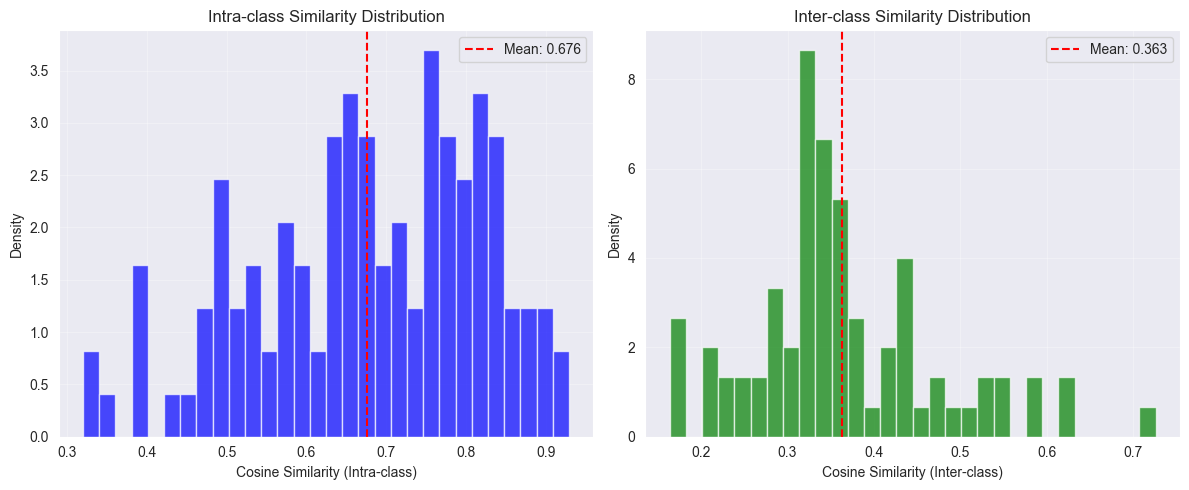


ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ


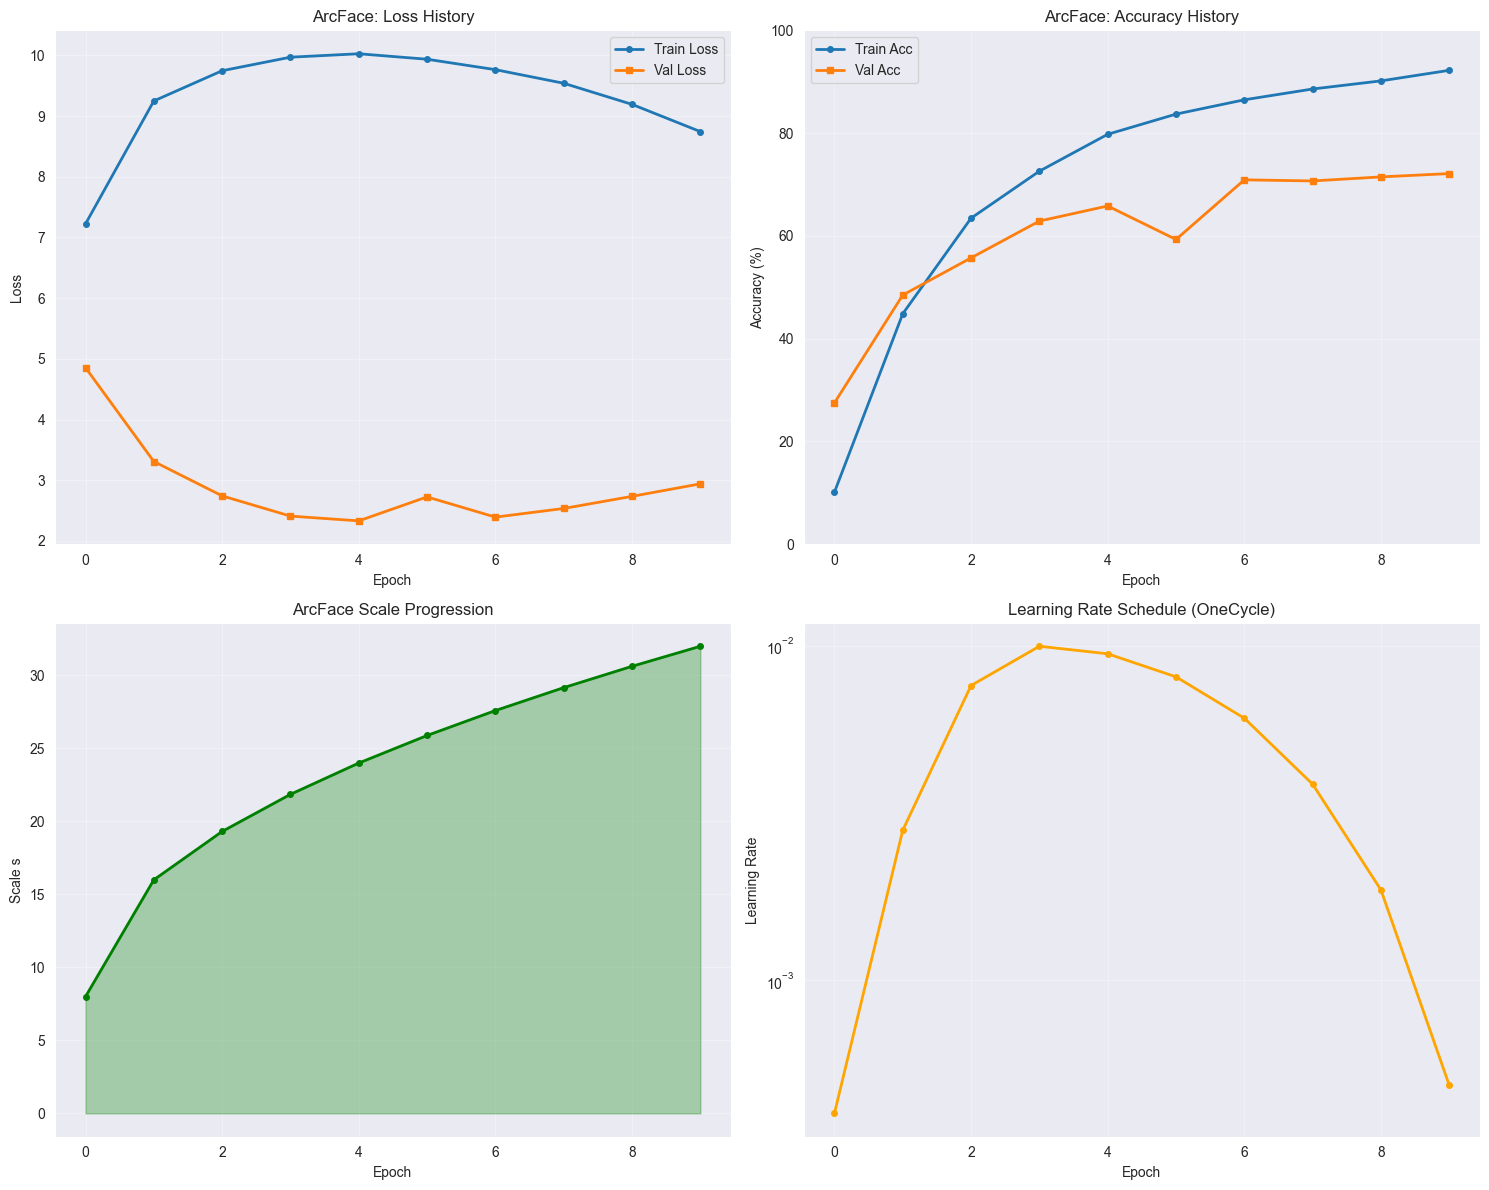


🎉 ОБУЧЕНИЕ ARCFACE ЗАВЕРШЕНО!
📊 Итоговые результаты:
  Лучшая точность на валидации: 72.13%
  Точность на тесте: 72.13%
  Финальный Scale s: 32.0
  Финальный Margin m: 0.50

💾 Файлы сохранены:
  Чекпоинты: 'checkpoints/'
  Лог: 'training_20260208_195544.log'
  Графики: 'arcface_training_results_20260208_195544.png'
  Анализ эмбеддингов: 'embedding_analysis.png'


In [28]:
# ==================== КОНФИГУРАЦИЯ ====================
class Config:
    def __init__(self):
        self.identity_df = df_id
        self.img_dir = img_dir
        self.max_classes = 350
        self.min_samples_per_person = 26
        self.seed = 42
        self.val_ratio = 0.15
        self.test_ratio = 0.15
        self.batch_size = 64
        self.num_workers = 0
        self.embedding_size = 512
        self.learning_rate = 0.001
        self.num_epochs_ce = 15
        self.num_epochs_arcface = 10
        self.arcface_s = 64.0
        self.arcface_m = 0.5
        self.arcface_easy_margin = True

# ==================== ОБРАБОТКА ДАННЫХ ====================
class CelebADataProcessor:
    def __init__(self, config):
        self.config = config
        self.identity_df = config.identity_df

        print(f"Всего данных: {len(self.identity_df)} изображений")
        print(f"Уникальных людей: {self.identity_df['person_id'].nunique()}")

    def filter_data(self):
        person_counts = self.identity_df['person_id'].value_counts()
        top_persons = person_counts.nlargest(self.config.max_classes).index
        self.filtered_df = self.identity_df[self.identity_df['person_id'].isin(top_persons)].copy()

        unique_ids = sorted(self.filtered_df['person_id'].unique())
        self.id_to_idx = {old_id: idx for idx, old_id in enumerate(unique_ids)}
        self.idx_to_id = {idx: old_id for old_id, idx in self.id_to_idx.items()}

        self.filtered_df['class_idx'] = self.filtered_df['person_id'].map(self.id_to_idx)

        print(f"\nПосле фильтрации:")
        print(f"  Всего изображений: {len(self.filtered_df)}")
        print(f"  Уникальных людей: {self.filtered_df['person_id'].nunique()}")
        print(f"  Диапазон меток: {self.filtered_df['class_idx'].min()} - {self.filtered_df['class_idx'].max()}")

        return len(unique_ids)

    def split_data_by_images(self):
        print(f"\nРазделение данных по изображениям (стратифицировано)...")

        train_df, temp_df = train_test_split(
            self.filtered_df,
            test_size=self.config.val_ratio + self.config.test_ratio,
            random_state=self.config.seed,
            stratify=self.filtered_df['class_idx']
        )

        val_df, test_df = train_test_split(
            temp_df,
            test_size=self.config.test_ratio/(self.config.val_ratio + self.config.test_ratio),
            random_state=self.config.seed,
            stratify=temp_df['class_idx']
        )

        self.train_df = train_df.reset_index(drop=True)
        self.val_df = val_df.reset_index(drop=True)
        self.test_df = test_df.reset_index(drop=True)

        print(f"Train: {len(self.train_df)} samples")
        print(f"Val: {len(self.val_df)} samples")
        print(f"Test: {len(self.test_df)} samples")

        return {
            'train': len(self.train_df),
            'val': len(self.val_df),
            'test': len(self.test_df),
            'num_persons': len(self.filtered_df['person_id'].unique())
        }

# ==================== ДАТАСЕТ ====================
class CelebAClassificationDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

        # Настройка логирования
        logging.basicConfig(
            level=logging.WARNING,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )
        self.logger = logging.getLogger(__name__)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['filename'])

        try:
            image = Image.open(img_path).convert('RGB')

            # Проверка валидности изображения
            if image.mode != 'RGB':
                image = image.convert('RGB')

            # Проверка размера
            if image.size[0] < 10 or image.size[1] < 10:
                self.logger.warning(f"Image {img_path} too small: {image.size}")
                image = image.resize((224, 224), Image.BILINEAR)

        except Exception as e:
            self.logger.warning(f"Cannot load image {img_path}: {e}")
            # Создаем черное изображение
            image = Image.new('RGB', (224, 224), color=(0, 0, 0))

        if self.transform:
            image = self.transform(image)

        label = int(row['class_idx'])
        return image, label

# ==================== МОДЕЛИ ====================
class SimpleFaceModel(nn.Module):
    def __init__(self, num_classes=350, embedding_size=512):
        super().__init__()

        self.backbone = models.resnet18(pretrained=True)
        in_features = self.backbone.fc.in_features

        # Заменяем последний слой
        self.backbone.fc = nn.Identity()

        # Эмбеддинг слой
        self.embedding = nn.Sequential(
            nn.Linear(in_features, embedding_size),
            nn.BatchNorm1d(embedding_size),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2)
        )

        # Классификатор
        self.classifier = nn.Linear(embedding_size, num_classes)

        # Замораживаем первые слои
        for name, param in self.backbone.named_parameters():
            if 'layer1' in name or 'conv1' in name or 'bn1' in name:
                param.requires_grad = False

    def forward(self, x):
        features = self.backbone(x)
        embedding = self.embedding(features)
        logits = self.classifier(embedding)
        return logits, embedding


class ArcMarginProduct(nn.Module):
    """ArcFace loss слой"""
    def __init__(self, in_features, out_features, s=32.0, m=0.5, easy_margin=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.easy_margin = easy_margin

        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)

        # Предварительные вычисления
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)

        # Угол для easy margin
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

        print(f"ArcFace инициализирован: s={s}, m={m}")

    def forward(self, input, label):
        # Нормализуем входные эмбеддинги
        cosine = F.linear(F.normalize(input, p=2, dim=1),
                         F.normalize(self.weight, p=2, dim=1))

        # Обеспечиваем численную стабильность
        cosine = cosine.clamp(-1 + 1e-7, 1 - 1e-7)

        # Вычисляем синус
        sine = torch.sqrt(1.0 - torch.pow(cosine, 2) + 1e-7)

        # Косинус угла с маржой
        phi = cosine * self.cos_m - sine * self.sin_m

        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)

        # One-hot encoding меток
        one_hot = torch.zeros_like(cosine)
        one_hot.scatter_(1, label.view(-1, 1).long(), 1)

        # Комбинируем
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.s

        return output

class ArcFaceModel(nn.Module):
    def __init__(self, num_classes=350, embedding_size=512, s=8.0, m=0.5):
        super().__init__()

        # Backbone (ResNet18)
        self.backbone = models.resnet18(pretrained=True)
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Identity()

        # Embedding слой
        self.embedding = nn.Sequential(
            nn.Linear(in_features, embedding_size),
            nn.BatchNorm1d(embedding_size),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2)
        )

        # ArcFace слой
        self.arcface = ArcMarginProduct(
            embedding_size,
            num_classes,
            s=s,
            m=m,
            easy_margin=True
        )

        print(f"\nArcFace Model создана:")
        print(f"  Количество классов: {num_classes}")
        print(f"  Embedding size: {embedding_size}")
        print(f"  Scale s: {s}")
        print(f"  Margin m: {m}")

    def load_from_ce_model(self, ce_model_path, device='cpu'):
        """Загрузка весов из CE модели"""
        print(f"\n{'='*50}")
        print("ЗАГРУЗКА ВЕСОВ ИЗ CE МОДЕЛИ")
        print(f"{'='*50}")

        try:
            if not os.path.exists(ce_model_path):
                print(f"⚠ Файл {ce_model_path} не найден")
                print("Обучаем ArcFace с нуля...")
                self._initialize_random()
                return False

            # Загружаем CE модель
            ce_checkpoint = torch.load(ce_model_path, map_location=device)

            # Проверяем формат чекпоинта
            if isinstance(ce_checkpoint, dict) and 'model_state_dict' in ce_checkpoint:
                ce_state_dict = ce_checkpoint['model_state_dict']
            else:
                ce_state_dict = ce_checkpoint

            # Получаем state_dict текущей модели
            own_state_dict = self.state_dict()

            # 1. Загружаем backbone (все ключи, начинающиеся с 'backbone.')
            backbone_count = 0
            for key in ce_state_dict:
                if key.startswith('backbone.'):
                    # Проверяем, есть ли такой ключ в текущей модели
                    if key in own_state_dict:
                        # Проверяем размерности
                        if ce_state_dict[key].shape == own_state_dict[key].shape:
                            own_state_dict[key] = ce_state_dict[key]
                            backbone_count += 1
                        else:
                            print(f"⚠ Размер не совпадает: {key} - {ce_state_dict[key].shape} vs {own_state_dict[key].shape}")

            print(f"✅ Backbone: загружено {backbone_count} параметров")

            # 2. Загружаем embedding слой
            embedding_count = 0
            embedding_mapping = {
                'embedding.0.weight': 'embedding.0.weight',
                'embedding.0.bias': 'embedding.0.bias',
                'embedding.1.weight': 'embedding.1.weight',
                'embedding.1.bias': 'embedding.1.bias'
            }

            for src_key, dst_key in embedding_mapping.items():
                if src_key in ce_state_dict and dst_key in own_state_dict:
                    if ce_state_dict[src_key].shape == own_state_dict[dst_key].shape:
                        own_state_dict[dst_key] = ce_state_dict[src_key]
                        embedding_count += 1
                        print(f"✅ Загружен {src_key} -> {dst_key}")
                    else:
                        print(f"⚠ Размер не совпадает: {src_key} - {ce_state_dict[src_key].shape} vs {own_state_dict[dst_key].shape}")

            print(f"✅ Embedding: загружено {embedding_count} параметров")

            # Загружаем обновленный state_dict
            missing_keys, unexpected_keys = self.load_state_dict(own_state_dict, strict=False)

            print(f"\n📊 Результат загрузки:")
            print(f"   Отсутствующие ключи: {len(missing_keys)}")
            if missing_keys:
                print(f"   Примеры: {missing_keys[:5]}")

            print(f"   Неожиданные ключи: {len(unexpected_keys)}")
            if unexpected_keys:
                print(f"   Примеры: {unexpected_keys[:5]}")

            # 3. Инициализируем ArcFace слой
            self._initialize_arcface()
            print(f"✅ ArcFace инициализирован (s={self.arcface.s})")

            return True

        except Exception as e:
            print(f"❌ Ошибка при загрузке: {e}")
            import traceback
            traceback.print_exc()
            print("Обучаем ArcFace с нуля...")
            self._initialize_random()
            return False

    def _initialize_arcface(self):
        """Инициализация ArcFace слоя"""
        nn.init.xavier_uniform_(self.arcface.weight)
        self.arcface.s = 8.0

    def _initialize_random(self):
        """Полная случайная инициализация"""
        for module in [self.embedding, self.arcface]:
            for m in module.modules():
                if isinstance(m, nn.Linear):
                    nn.init.xavier_uniform_(m.weight)
                    if m.bias is not None:
                        nn.init.zeros_(m.bias)
                elif isinstance(m, nn.BatchNorm1d):
                    nn.init.ones_(m.weight)
                    nn.init.zeros_(m.bias)

        self.arcface.s = 8.0

    def forward(self, x, labels=None):
        # Извлекаем фичи
        features = self.backbone(x)

        # Получаем эмбеддинги
        embeddings = self.embedding(features)

        # Нормализуем для ArcFace
        embeddings = F.normalize(embeddings, p=2, dim=1)

        if labels is not None:
            # Для обучения: возвращаем logits и эмбеддинги
            logits = self.arcface(embeddings, labels)
            return logits, embeddings

        # Для инференса: возвращаем только эмбеддинги
        return embeddings

# ==================== УТИЛИТЫ ДЛЯ ВАЛИДАЦИИ ====================
def analyze_embeddings(model, loader, device, num_samples=1000):
    """Анализ качества эмбеддингов"""
    model.eval()
    all_embeddings = []
    all_labels = []

    print("\nАнализ качества эмбеддингов...")
    with torch.no_grad():
        for i, (images, labels) in enumerate(tqdm(loader, desc="Extracting embeddings")):
            if i * loader.batch_size >= num_samples:
                break

            images = images.to(device)
            embeddings = model(images)  # Эмбеддинги уже нормализованы

            all_embeddings.append(embeddings.cpu())
            all_labels.append(labels)

    if not all_embeddings:
        return None, None

    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)

    # Берем подвыборку для анализа
    if len(all_embeddings) > 5000:
        indices = torch.randperm(len(all_embeddings))[:5000]
        all_embeddings = all_embeddings[indices]
        all_labels = all_labels[indices]

    # Вычисляем косинусные расстояния
    embeddings_norm = all_embeddings  # Уже нормализованы
    cosine_sim = torch.mm(embeddings_norm, embeddings_norm.t())

    # Анализ внутриклассовых и межклассовых расстояний
    intra_distances = []
    inter_distances = []

    unique_labels = torch.unique(all_labels)

    for i, label_i in enumerate(unique_labels[:20]):  # Ограничим для скорости
        mask_i = (all_labels == label_i)
        indices_i = torch.where(mask_i)[0]

        if len(indices_i) > 1:
            # Внутри класса
            for j in range(min(len(indices_i), 5)):  # Берем несколько пар
                for k in range(j+1, min(len(indices_i), 5)):
                    sim = cosine_sim[indices_i[j], indices_i[k]].item()
                    intra_distances.append(sim)

        # Между классами (берем первый другой класс)
        if i < len(unique_labels) - 1:
            label_j = unique_labels[i+1]
            mask_j = (all_labels == label_j)
            indices_j = torch.where(mask_j)[0]

            if len(indices_j) > 0:
                # Берем несколько пар между классами
                for _ in range(min(5, len(indices_i))):
                    idx_i = indices_i[torch.randint(0, len(indices_i), (1,))]
                    idx_j = indices_j[torch.randint(0, len(indices_j), (1,))]
                    sim = cosine_sim[idx_i, idx_j].item()
                    inter_distances.append(sim)

    if intra_distances and inter_distances:
        intra_mean = np.mean(intra_distances)
        inter_mean = np.mean(inter_distances)

        print(f"\n📊 Качество эмбеддингов:")
        print(f"  Средняя косинусная схожесть внутри класса: {intra_mean:.4f}")
        print(f"  Средняя косинусная схожесть между классами: {inter_mean:.4f}")
        print(f"  Ratio (inter/intra): {inter_mean/intra_mean if intra_mean > 0 else float('inf'):.2f}")

        # Создаем гистограмму расстояний
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Гистограмма внутриклассовых расстояний
        axes[0].hist(intra_distances, bins=30, alpha=0.7, color='blue', density=True)
        axes[0].axvline(x=intra_mean, color='red', linestyle='--', label=f'Mean: {intra_mean:.3f}')
        axes[0].set_xlabel('Cosine Similarity (Intra-class)')
        axes[0].set_ylabel('Density')
        axes[0].set_title('Intra-class Similarity Distribution')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        # Гистограмма межклассовых расстояний
        axes[1].hist(inter_distances, bins=30, alpha=0.7, color='green', density=True)
        axes[1].axvline(x=inter_mean, color='red', linestyle='--', label=f'Mean: {inter_mean:.3f}')
        axes[1].set_xlabel('Cosine Similarity (Inter-class)')
        axes[1].set_ylabel('Density')
        axes[1].set_title('Inter-class Similarity Distribution')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('embedding_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()

    return all_embeddings, all_labels

# ==================== ФУНКЦИИ ОБУЧЕНИЯ ====================
def train_epoch_ce(model, loader, optimizer, criterion, device):
    """Обучение CE модели для одной эпохи"""
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    pbar = tqdm(loader, desc="Training CE")
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        logits, _ = model(images)
        loss = criterion(logits, labels)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        total_loss += loss.item() * images.size(0)
        _, predicted = logits.max(1)
        correct += predicted.eq(labels).sum().item()
        total += images.size(0)

        current_acc = 100. * predicted.eq(labels).sum().item() / images.size(0)
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{current_acc:.1f}%'
        })

    avg_loss = total_loss / total if total > 0 else 0
    accuracy = 100. * correct / total if total > 0 else 0

    return avg_loss, accuracy

def train_epoch_arcface(model, loader, optimizer, criterion, device, epoch, total_epochs):
    """Обучение ArcFace модели для одной эпохи"""
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    # Progressive scaling - более плавное увеличение
    min_scale, max_scale = 8.0, 32.0
    if total_epochs <= 1:
        current_scale = max_scale
    else:
        progress = epoch / (total_epochs - 1)
        # Используем квадратичное увеличение
        current_scale = min_scale + (max_scale - min_scale) * (progress ** 0.5)

    model.arcface.s = current_scale

    pbar = tqdm(loader, desc=f"Training ArcFace (s={model.arcface.s:.1f}, m={model.arcface.m:.2f})")
    for batch_idx, (images, labels) in enumerate(pbar):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        logits, embeddings = model(images, labels)
        loss = criterion(logits, labels)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        # Вычисляем accuracy
        with torch.no_grad():
            # Для ArcFace используем cosine similarity
            embeddings_norm = embeddings
            weights_norm = F.normalize(model.arcface.weight.data, p=2, dim=1)
            cosine = torch.mm(embeddings_norm, weights_norm.t())
            predicted = cosine.argmax(dim=1)

            total_loss += loss.item() * images.size(0)
            correct += predicted.eq(labels).sum().item()
            total += images.size(0)

            current_acc = 100. * predicted.eq(labels).sum().item() / images.size(0)
            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{current_acc:.1f}%',
                'scale': f'{model.arcface.s:.1f}'
            })

    avg_loss = total_loss / total if total > 0 else 0
    accuracy = 100. * correct / total if total > 0 else 0

    return avg_loss, accuracy

def validate(model, loader, criterion, device, model_type='ce'):
    """Валидация модели"""
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        pbar = tqdm(loader, desc="Validation")
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)

            if model_type == 'ce':
                logits, _ = model(images)
                _, predicted = logits.max(1)
            else:  # arcface
                embeddings = model(images)
                embeddings_norm = embeddings
                weights_norm = F.normalize(model.arcface.weight.data, p=2, dim=1)
                cosine = torch.mm(embeddings_norm, weights_norm.t())
                logits = model.arcface.s * cosine
                predicted = cosine.argmax(dim=1)

            loss = criterion(logits, labels)
            val_loss += loss.item() * images.size(0)
            val_correct += predicted.eq(labels).sum().item()
            val_total += images.size(0)

            current_acc = 100. * predicted.eq(labels).sum().item() / images.size(0)
            pbar.set_postfix({'acc': f'{current_acc:.1f}%'})

    avg_loss = val_loss / val_total if val_total > 0 else 0
    accuracy = 100. * val_correct / val_total if val_total > 0 else 0

    return avg_loss, accuracy

# ==================== ОСНОВНАЯ ФУНКЦИЯ ====================
def main():
    # Настройка логирования
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(f'training_{timestamp}.log'),
            logging.StreamHandler()
        ]
    )
    logger = logging.getLogger(__name__)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name(0)}")
        print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

    # Инициализация конфигурации
    config = Config()

    # ==================== 1. ПОДГОТОВКА ДАННЫХ ====================
    print("\n" + "="*60)
    print("ПОДГОТОВКА ДАННЫХ")
    print("="*60)

    # Здесь нужно загрузить ваши данные
    # config.identity_df = df_id  # ваш DataFrame
    # config.img_dir = img_dir    # путь к изображениям

    if not hasattr(config, 'identity_df') or config.identity_df is None:
        print("❌ Ошибка: identity_df не задан в конфигурации")
        print("Установите config.identity_df = ваш_dataframe")
        return

    if not hasattr(config, 'img_dir') or config.img_dir is None:
        print("❌ Ошибка: img_dir не задан в конфигурации")
        print("Установите config.img_dir = 'путь/к/изображениям'")
        return

    processor = CelebADataProcessor(config)
    num_classes = processor.filter_data()
    stats = processor.split_data_by_images()

    # Трансформации
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
        transforms.RandomGrayscale(p=0.1),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

    # Датасеты
    train_dataset = CelebAClassificationDataset(
        processor.train_df, config.img_dir, train_transform
    )
    val_dataset = CelebAClassificationDataset(
        processor.val_df, config.img_dir, val_transform
    )
    test_dataset = CelebAClassificationDataset(
        processor.test_df, config.img_dir, val_transform
    )

    # Даталоадеры
    train_loader = DataLoader(
        train_dataset, batch_size=config.batch_size,
        shuffle=True, num_workers=config.num_workers,
        pin_memory=True, drop_last=True
    )
    val_loader = DataLoader(
        val_dataset, batch_size=config.batch_size,
        shuffle=False, num_workers=config.num_workers
    )
    test_loader = DataLoader(
        test_dataset, batch_size=config.batch_size,
        shuffle=False, num_workers=config.num_workers
    )

    # Создаем папку для чекпоинтов
    os.makedirs('checkpoints', exist_ok=True)

    # ==================== 2. ОБУЧЕНИЕ CE МОДЕЛИ ====================
    print("\n" + "="*60)
    print("ОБУЧЕНИЕ CE МОДЕЛИ")
    print("="*60)

    ce_checkpoint_path = 'checkpoints/best_model_ce.pth'
    ce_model_exists = os.path.exists(ce_checkpoint_path)

    if not ce_model_exists:
        print("Обучение CE модели с нуля...")

        model_ce = SimpleFaceModel(
            num_classes=num_classes,
            embedding_size=config.embedding_size
        ).to(device)

        # Размораживаем больше слоев
        for param in model_ce.backbone.layer2.parameters():
            param.requires_grad = True
        for param in model_ce.backbone.layer3.parameters():
            param.requires_grad = True

        optimizer_ce = optim.AdamW(
            filter(lambda p: p.requires_grad, model_ce.parameters()),
            lr=0.001,
            weight_decay=1e-4
        )

        scheduler_ce = optim.lr_scheduler.CosineAnnealingLR(
            optimizer_ce,
            T_max=config.num_epochs_ce,
            eta_min=1e-6
        )

        criterion_ce = nn.CrossEntropyLoss(label_smoothing=0.1)

        best_ce_acc = 0
        ce_history = {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': []}

        for epoch in range(config.num_epochs_ce):
            print(f"\nEpoch {epoch+1}/{config.num_epochs_ce} (CE)")
            print("-" * 40)

            train_loss, train_acc = train_epoch_ce(
                model_ce, train_loader, optimizer_ce, criterion_ce, device
            )

            val_loss, val_acc = validate(
                model_ce, val_loader, criterion_ce, device, 'ce'
            )

            # Сохраняем историю
            ce_history['loss'].append(train_loss)
            ce_history['acc'].append(train_acc)
            ce_history['val_loss'].append(val_loss)
            ce_history['val_acc'].append(val_acc)

            print(f"\nИтоги эпохи:")
            print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
            print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
            print(f"  Learning Rate: {optimizer_ce.param_groups[0]['lr']:.2e}")

            if val_acc > best_ce_acc:
                best_ce_acc = val_acc
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model_ce.state_dict(),
                    'val_acc': val_acc,
                    'optimizer_state_dict': optimizer_ce.state_dict(),
                    'history': ce_history,
                    'num_classes': num_classes
                }, ce_checkpoint_path)
                print(f"  ✓ Сохранена CE модель (Acc: {val_acc:.2f}%)")

            scheduler_ce.step()

        print(f"\n🎯 Лучшая точность CE модели: {best_ce_acc:.2f}%")
    else:
        print(f"✅ CE модель уже обучена: {ce_checkpoint_path}")

    # ==================== 3. FINE-TUNING С ARCFACE ====================
    print("\n" + "="*60)
    print("FINE-TUNING С ARCFACE LOSS")
    print("="*60)

    # Создаем ArcFace модель
    model_arcface = ArcFaceModel(
        num_classes=num_classes,
        embedding_size=config.embedding_size,
        s=8.0,  # Начинаем с меньшего scale
        m=config.arcface_m
    ).to(device)

    # Загружаем веса из CE модели
    print("\nЗагрузка весов из CE модели...")
    load_success = model_arcface.load_from_ce_model(ce_checkpoint_path, device)

    # Размораживаем все слои для fine-tuning
    for param in model_arcface.parameters():
        param.requires_grad = True

    # Проверка модели
    print("\n" + "="*50)
    print("ПРОВЕРКА МОДЕЛИ")
    print("="*50)

    model_arcface.eval()
    with torch.no_grad():
        test_images, test_labels = next(iter(train_loader))
        test_images = test_images[:4].to(device)
        test_labels = test_labels[:4].to(device)

        logits, embeddings = model_arcface(test_images, test_labels)

        print(f"\n1. Размерности:")
        print(f"   Logits shape: {logits.shape}")
        print(f"   Embeddings shape: {embeddings.shape}")

        print(f"\n2. Численные значения:")
        print(f"   Logits range: [{logits.min():.4f}, {logits.max():.4f}]")
        print(f"   Logits mean/std: {logits.mean():.4f} / {logits.std():.4f}")
        print(f"   Embeddings norm: {embeddings.norm(p=2, dim=1).mean():.4f} ± {embeddings.norm(p=2, dim=1).std():.4f}")

        print(f"\n3. Проверка accuracy:")
        embeddings_norm = embeddings  # Уже нормализованы
        weights_norm = F.normalize(model_arcface.arcface.weight.data, p=2, dim=1)
        cosine = torch.mm(embeddings_norm, weights_norm.t())
        predicted = cosine.argmax(dim=1)
        accuracy = (predicted == test_labels).float().mean().item()
        print(f"   Accuracy на тестовом батче: {accuracy:.2%}")

        test_loss = nn.CrossEntropyLoss()(logits, test_labels)
        print(f"   Loss: {test_loss.item():.4f}")

    # Оптимизатор для fine-tuning
    optimizer_arc = optim.AdamW(
        model_arcface.parameters(),
        lr=0.001,
        weight_decay=0.0005
    )

    # Scheduler с warmup
    scheduler_arc = optim.lr_scheduler.OneCycleLR(
        optimizer_arc,
        max_lr=config.learning_rate * 10,
        epochs=config.num_epochs_arcface,
        steps_per_epoch=len(train_loader),
        pct_start=0.3
    )

    # Loss function с label smoothing
    criterion_arc = nn.CrossEntropyLoss(label_smoothing=0.1)

    # Обучение ArcFace
    print("\n" + "="*60)
    print("НАЧАЛО ОБУЧЕНИЯ ARCFACE")
    print("="*60)

    best_arc_acc = 0
    arc_history = {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'scale': []}

    for epoch in range(config.num_epochs_arcface):
        print(f"\n{'='*50}")
        print(f"Epoch {epoch+1}/{config.num_epochs_arcface} - ArcFace Fine-tuning")
        print(f"{'='*50}")

        # Обучение
        train_loss, train_acc = train_epoch_arcface(
            model_arcface, train_loader, optimizer_arc, criterion_arc, device,
            epoch, config.num_epochs_arcface
        )

        # Валидация
        val_loss, val_acc = validate(
            model_arcface, val_loader, criterion_arc, device, 'arcface'
        )

        # Сохраняем историю
        arc_history['loss'].append(train_loss)
        arc_history['acc'].append(train_acc)
        arc_history['val_loss'].append(val_loss)
        arc_history['val_acc'].append(val_acc)
        arc_history['scale'].append(model_arcface.arcface.s)

        print(f"\n📊 Итоги эпохи:")
        print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"  Scale s: {model_arcface.arcface.s:.1f}")
        print(f"  Margin m: {model_arcface.arcface.m:.2f}")
        print(f"  Learning Rate: {optimizer_arc.param_groups[0]['lr']:.2e}")

        # Сохраняем лучшую модель
        if val_acc > best_arc_acc:
            best_arc_acc = val_acc
            torch.save({
                'epoch': epoch,
                'model_state_dict': model_arcface.state_dict(),
                'optimizer_state_dict': optimizer_arc.state_dict(),
                'val_acc': val_acc,
                'scale': model_arcface.arcface.s,
                'margin': model_arcface.arcface.m,
                'history': arc_history,
                'num_classes': num_classes
            }, 'checkpoints/best_model_arcface.pth')
            print(f"  💾 Сохранена лучшая ArcFace модель (Val Acc: {val_acc:.2f}%)")

        # Обновляем scheduler
        scheduler_arc.step()

    # ==================== 4. ТЕСТИРОВАНИЕ ====================
    print("\n" + "="*60)
    print("ТЕСТИРОВАНИЕ ARCFACE МОДЕЛИ")
    print("="*60)

    # Загружаем лучшую ArcFace модель
    arc_checkpoint_path = 'checkpoints/best_model_arcface.pth'
    if os.path.exists(arc_checkpoint_path):
        arc_checkpoint = torch.load(arc_checkpoint_path, map_location=device)
        model_arcface.load_state_dict(arc_checkpoint['model_state_dict'])
        print(f"✅ Загружена лучшая ArcFace модель (Val Acc: {arc_checkpoint['val_acc']:.2f}%)")
    else:
        print("⚠ Лучшая модель не найдена, используем последнюю")

    # Тестирование
    test_loss, test_acc = validate(
        model_arcface, test_loader, criterion_arc, device, 'arcface'
    )

    print(f"\n🎯 РЕЗУЛЬТАТЫ ARCFACE НА ТЕСТОВОЙ ВЫБОРКЕ:")
    print(f"  Test Loss: {test_loss:.4f}")
    print(f"  Test Accuracy: {test_acc:.2f}%")
    print(f"  Final Scale s: {model_arcface.arcface.s:.1f}")
    print(f"  Final Margin m: {model_arcface.arcface.m:.2f}")

    # Анализ эмбеддингов
    print("\n" + "="*60)
    print("АНАЛИЗ КАЧЕСТВА ЭМБЕДДИНГОВ")
    print("="*60)

    test_embeddings, test_labels = analyze_embeddings(
        model_arcface, test_loader, device, num_samples=2000
    )

    # ==================== 5. ВИЗУАЛИЗАЦИЯ ====================
    print("\n" + "="*60)
    print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ")
    print("="*60)

    # Создаем графики
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Loss history
    axes[0, 0].plot(arc_history['loss'], label='Train Loss', linewidth=2, marker='o', markersize=4)
    axes[0, 0].plot(arc_history['val_loss'], label='Val Loss', linewidth=2, marker='s', markersize=4)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('ArcFace: Loss History')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Accuracy history
    axes[0, 1].plot(arc_history['acc'], label='Train Acc', linewidth=2, marker='o', markersize=4)
    axes[0, 1].plot(arc_history['val_acc'], label='Val Acc', linewidth=2, marker='s', markersize=4)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy (%)')
    axes[0, 1].set_title('ArcFace: Accuracy History')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim([0, 100])

    # Scale s history
    axes[1, 0].plot(arc_history['scale'], linewidth=2, marker='o', markersize=4, color='green')
    axes[1, 0].fill_between(range(len(arc_history['scale'])),
                           arc_history['scale'],
                           alpha=0.3, color='green')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Scale s')
    axes[1, 0].set_title('ArcFace Scale Progression')
    axes[1, 0].grid(True, alpha=0.3)

    # Learning rate history (симулируем)
    lr_values = []
    temp_optimizer = optim.AdamW([torch.zeros(1)], lr=config.learning_rate)
    temp_scheduler = optim.lr_scheduler.OneCycleLR(
        temp_optimizer,
        max_lr=config.learning_rate * 10,
        epochs=config.num_epochs_arcface,
        steps_per_epoch=len(train_loader),
        pct_start=0.3
    )

    for epoch in range(config.num_epochs_arcface):
        for _ in range(len(train_loader)):
            lr_values.append(temp_optimizer.param_groups[0]['lr'])
            temp_scheduler.step()

    # Берем значения на начало каждой эпохи
    epoch_lr = [lr_values[i * len(train_loader)] for i in range(config.num_epochs_arcface)]

    axes[1, 1].plot(epoch_lr, linewidth=2, marker='o', markersize=4, color='orange')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Learning Rate')
    axes[1, 1].set_title('Learning Rate Schedule (OneCycle)')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_yscale('log')

    plt.tight_layout()
    plt.savefig(f'arcface_training_results_{timestamp}.png', dpi=150, bbox_inches='tight')
    plt.show()


    print("\n" + "="*60)
    print("🎉 ОБУЧЕНИЕ ARCFACE ЗАВЕРШЕНО!")
    print("="*60)
    print(f"📊 Итоговые результаты:")
    print(f"  Лучшая точность на валидации: {best_arc_acc:.2f}%")
    print(f"  Точность на тесте: {test_acc:.2f}%")
    print(f"  Финальный Scale s: {model_arcface.arcface.s:.1f}")
    print(f"  Финальный Margin m: {model_arcface.arcface.m:.2f}")
    print(f"\n💾 Файлы сохранены:")
    print(f"  Чекпоинты: 'checkpoints/'")
    print(f"  Лог: 'training_{timestamp}.log'")
    print(f"  Графики: 'arcface_training_results_{timestamp}.png'")
    print(f"  Анализ эмбеддингов: 'embedding_analysis.png'")

if __name__ == "__main__":
    main()